<a href="https://colab.research.google.com/github/CarolineAndradeR/Data-Science/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Conceitos**

**Linguagem natural e análise de sentimentos**

Modelos de aprendizado profundo (Deep Learning) - Processamento de texto por meio da utilização de algoritmos de redes neurais recorrentes RNN, o processamento de texto tem aplixações em diversas problemáticas da vida real, entre elas:
*   Classificação de documentos - análise de grandes volumes de processos jurpidicos para classificação de parecer e sentença.
*   Comparação de documentos - avaliação de textos para detecção de cópias e plágios.
*   Tradutor de idioma - indentificação de contextos no encadeamento de palavras para traduzir de um idioma para outro.
*   Análise/ classificação de sentimentos em comentários de redes sociais.
*   Criação de textos, criação de novos textos com base no padrão de escrita de um autor usado para criação de matérias de revistas e editoriais.



O aprensizado profundo, ou **Deep Learning**, é uma subárea do aprendizado em máquina ML baseado em algoritmos que utilizam redes neurais artificiais (RNA)

O RNA pode ser dividido em três etapas:
1.   O modelo recebe um conjunto de sinais (X) como entrada.
2.   Cada sinal é multiplicado por um número que pondera a influência desse sinal na saída da unidade. (Podemos chamar o conjunto desses números de pesos (W)).
3.   É realizada uma soma ponderada de todos os sinais, produzindo um número (valor escalar).
4.   Se o resultado for maior que um limiar, a unidade produz um valor resultante determinado.


Uma rede neural é um conjunto de neurônios organizados em camadas, formando a Rede Multi Layer Perceptron (MLP). Os neurônios processam os dados de entrada e propagam a saída para outras camadas. A MLP possui uma camada de entrada, uma de saída e uma ou mais camadas ocultas. As camadas ocultas são densamente conectadas, com os neurônios de uma camada servindo de entrada para a próxima.

Deep está relacionado ao número de camadas ocultas que existem na rede neural, quanto mais camada, mais deeo é a rede neural. Rede neurais modernas possuem facilmente mais de dez camadas ocultas, no caso de Deeo Learning é um framework (TensorFlow) utilizado para treinamento e representação de aprendizados por meio de dados (textos).

O uso da técina de Deeo Learning é muito vasto e pode ser usado em vários problemas da ciência de dados, incluino classificação, regressão, aprendizao por reforço, redução de dimensionalidade, clusterização e análise de sentimentos.

**RNN - Redes neurais recorrentes**

São uma técnica de deep learning muito empregada em aplicações de processamento de linguagem natural (NLP) em que os dados são processados sequencialmente, resultando em uma análise aprimorada de conjunto de dados complexos, por meio da modelagem em séries temporais dos dados de entrada.

A extração da informação não parte apenas dos dados, mas também da forma que é apresentada. A informação é entendida por uma sequência de palavras, ou seja, nãp descartamos as palavras anteriores ao ler novas palavras, nós compreendemos a nova palavra a partir das anteriores, essa é a característica da memória.

**Diferença entre Rede neural recorrente e rede neural artificial**

A diferença principal entre ela é que a saída de uma RNN retroalimenta a entrada do próprio neurônio. A saída atual do neurônio ocorre por meio da função de ativação das entradas atuais multiplicadas pelos seus pesos somados á saída anterior multiplicada pele seu peso.

**Arquiteturas de redes RNN LSTM e GRU**

Na prática, uma RNN não possui capacidade de capturar informações de muitas etapas anteriores, devido á grande complexidade desse processamento, um problama conhecido como explosão de gradiente, por isso as redes LSTM são muito utilizadas.

**Long Short Term Memory LSTM** - é um tipo de rede recorrente muito utilizada em tarefas de processamento de linguagem natural. Essa rede é útil para classificar e prever séries temporais com intervalos de tempo e duração desconhecidos. Basicamente, trata-se de uma RNN que computa os estados ocultos de forma um pouco diferente, possui uma estrutura em cadeia que contem quatro redes neurais e diferentes blocos de memória chamados células.

**GRU** - é uma solução para memória de curto prazo e possui portões para regular o floxo de informação, porém, uma diferença é a quantidade de gate comparada com LSTM.

# **Aplicação de RNN LSTM e GRU**

Aplicando os conceitos de LSTM e GRU para treinar um conjunto de dados de comentários de filmes para classificar se a review foi positiva ou negativa. A predição desse modelo é entendida como positiva se os valores de saída forem maiores que 0 e negativa caso contrário. Dessa forma podemos facilmente predizer novas reviews, classificando como positiva ou negativa automaticamente.

**Alterar o ambiente de execução para GPU para acelerar o aprendizando, faz com que o algoritmo treine de forma mais rápida, porque é usado processamento paralelizado**

In [1]:
import numpy as np
# Base de dados de exemplo da propria tensorflow
import tensorflow_datasets as tfds
import tensorflow as tf

BUFFER_SIZE = 10000
BATCH_SIZE = 64
VOCAB_SIZE=1000

# Baixando e carregando a base de dados
dataset, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteJ03KCU/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteJ03KCU/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteJ03KCU/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [2]:
# Dividindo e embaralhando os dados
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Realizando o pre-processamento, convertendo palavras para números
# Dado de entrada é do tipo texto, e o encoder ele transforma palavras em números
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [3]:
# Criação do modelo para a rede neural
# Esse modelo é o mais simples para redes
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    # Rede densa, com 64 saídas, reduz esses passos para um único neuronio especialista
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, None, 64)          64000     
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 138,369
Trainable params: 138,369
Non-trai

In [4]:
# Compilando o model
# BINARY CROSS ENTROPY - Ele entende a saída como binária, é uma boa opção já que só tem um neurônio na saída.
# ADAM - uma das técnicas para otimização dos pesos
# EPOCAS - quantidade de vezes que o algoritmo vai passar pela rede
# ACCURACY - taxa de acerto do modelo.
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [5]:
# Treinando o modelo
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)
# Validando o modelo
test_loss, test_acc = model.evaluate(test_dataset)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

Epoch 1/10
391/391 [==============================] - 72s 139ms/step - loss: 0.6524 - accuracy: 0.5543 - val_loss: 0.5178 - val_accuracy: 0.7839
Epoch 2/10
391/391 [==============================] - 50s 127ms/step - loss: 0.4220 - accuracy: 0.8019 - val_loss: 0.3807 - val_accuracy: 0.8401
Epoch 3/10
391/391 [==============================] - 25s 65ms/step - loss: 0.3520 - accuracy: 0.8472 - val_loss: 0.3541 - val_accuracy: 0.8432
Epoch 4/10
391/391 [==============================] - 48s 121ms/step - loss: 0.3259 - accuracy: 0.8600 - val_loss: 0.3376 - val_accuracy: 0.8516
Epoch 5/10
391/391 [==============================] - 31s 79ms/step - loss: 0.3139 - accuracy: 0.8684 - val_loss: 0.3265 - val_accuracy: 0.8510
Epoch 6/10
391/391 [==============================] - 28s 72ms/step - loss: 0.3065 - accuracy: 0.8701 - val_loss: 0.3321 - val_accuracy: 0.8484
Epoch 7/10
391/391 [==============================] - 33s 84ms/step - loss: 0.3057 - accuracy: 0.8715 - val_loss: 0.3292 - val_accura

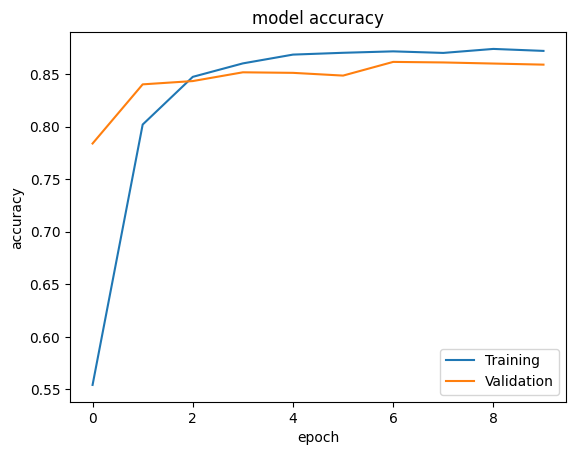

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

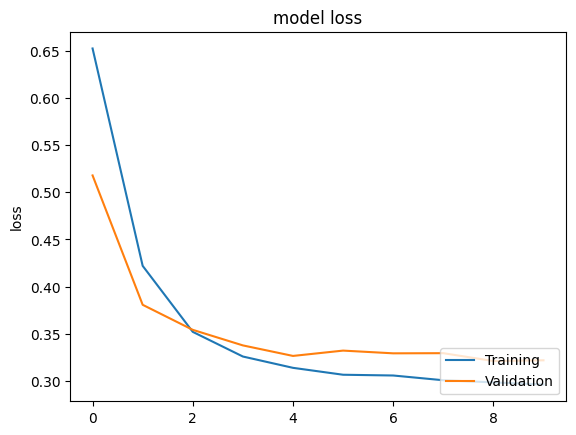

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

In [8]:
# Realizando uma predição
# Como o data set está em iglês e o modelo aprendeu em inglês a avaliação precisa ser em inglês também
sample_text = ('The movie was cool. The animation and the graphics '
              'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))

if predictions > 0:
  print("Avaliação positiva", predictions)
else:
  print("Avaliação negativa", predictions)

1/1 [==============================] - 3s 3s/step
Avaliação negativa [[-0.04933975]]


In [9]:
# Realizando uma predição negativa
sample_text = ('The movie was a real wast of time.'
              'I did not like the plot')
predictions = model.predict(np.array([sample_text]))

if predictions > 0:
  print("Avaliação positiva", predictions)
else:
  print("Avaliação negativa", predictions)

1/1 [==============================] - 0s 22ms/step
Avaliação negativa [[-0.91685563]]


# **Criação de letra de música**

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Carrega a base de dados
data = open('/content/drive/MyDrive/Asset_FIAP/musica.txt').read()
corpus = data.lower().split("\n")
tokenizer = Tokenizer()

In [18]:
tokenizer.fit_on_texts(corpus)
print(tokenizer.word_index)
total_words = len(tokenizer.word_index) + 1
print("Total de palavras: ",total_words)

{'que': 1, 'o': 2, 'não': 3, 'eu': 4, 'explicação': 5, 'e': 6, 'de': 7, 'a': 8, 'tem': 9, 'quando': 10, 'segundo': 11, 'sol': 12, 'chegar': 13, 'para': 14, 'realinhar': 15, 'as': 16, 'órbitas': 17, 'dos': 18, 'planetas': 19, 'derrubando': 20, 'com': 21, 'assombro': 22, 'exemplar': 23, 'os': 24, 'astrônomos': 25, 'diriam': 26, 'se': 27, 'tratar': 28, 'um': 29, 'outro': 30, 'cometa': 31, 'você': 32, 'sem': 33, 'seu': 34, 'telefone': 35, 'irá': 36, 'tocar': 37, 'em': 38, 'sua': 39, 'nova': 40, 'casa': 41, 'abriga': 42, 'agora': 43, 'trilha': 44, 'incluída': 45, 'nessa': 46, 'minha': 47, 'conversão': 48, 'só': 49, 'queria': 50, 'te': 51, 'contar': 52, 'fui': 53, 'lá': 54, 'fora': 55, 'vi': 56, 'dois': 57, 'sóis': 58, 'num': 59, 'dia': 60, 'vida': 61, 'ardia': 62, 'digo': 63, 'me': 64, 'surpreendi': 65, 'antes': 66, 'visse': 67, 'disse': 68, 'pude': 69, 'acreditar': 70, 'mas': 71, 'pode': 72, 'ter': 73, 'certeza': 74}
Total de palavras:  75


In [19]:
# tokenize o texto, transforma cada palavra em uma lista de numeros inteiros
input_sequences = []

for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i + 1]
        input_sequences.append(n_gram_sequence)

print(input_sequences)

[[10, 2], [10, 2, 11], [10, 2, 11, 12], [10, 2, 11, 12, 13], [14, 15], [14, 15, 16], [14, 15, 16, 17], [14, 15, 16, 17, 18], [14, 15, 16, 17, 18, 19], [20, 21], [20, 21, 2], [20, 21, 2, 22], [20, 21, 2, 22, 23], [2, 1], [2, 1, 24], [2, 1, 24, 25], [2, 1, 24, 25, 26], [2, 1, 24, 25, 26, 27], [2, 1, 24, 25, 26, 27, 28], [7, 29], [7, 29, 30], [7, 29, 30, 31], [10, 2], [10, 2, 11], [10, 2, 11, 12], [10, 2, 11, 12, 13], [14, 15], [14, 15, 16], [14, 15, 16, 17], [14, 15, 16, 17, 18], [14, 15, 16, 17, 18, 19], [20, 21], [20, 21, 2], [20, 21, 2, 22], [20, 21, 2, 22, 23], [2, 1], [2, 1, 24], [2, 1, 24, 25], [2, 1, 24, 25, 26], [2, 1, 24, 25, 26, 27], [2, 1, 24, 25, 26, 27, 28], [7, 29], [7, 29, 30], [7, 29, 30, 31], [3, 63], [3, 63, 1], [3, 63, 1, 3], [3, 63, 1, 3, 64], [3, 63, 1, 3, 64, 65], [66, 1], [66, 1, 4], [66, 1, 4, 67], [66, 1, 4, 67, 32], [66, 1, 4, 67, 32, 68], [6, 4], [6, 4, 3], [6, 4, 3, 69], [6, 4, 3, 69, 70], [71, 32], [71, 32, 72], [71, 32, 72, 73], [71, 32, 72, 73, 74], [7, 1],

In [20]:
# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences,
                                         maxlen=max_sequence_len,
                                         padding='pre'))
print(input_sequences)

[[ 0  0  0 ...  0 10  2]
 [ 0  0  0 ... 10  2 11]
 [ 0  0  0 ...  2 11 12]
 ...
 [ 0  0  0 ...  0  3  9]
 [ 0  0  0 ...  3  9  3]
 [ 0  0  0 ...  9  3  9]]


In [21]:
# cria predictors and label
xs, labels = input_sequences[:, :-1], input_sequences[:, -1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [22]:
# Cria a rede
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len - 1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 6, 100)            7500      
                                                                 
 bidirectional_1 (Bidirectio  (None, 300)              301200    
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 75)                22575     
                                                                 
Total params: 331,275
Trainable params: 331,275
Non-trainable params: 0
_________________________________________________________________


In [23]:
adam = Adam(learning_rate=0.01)
# Quanto tem mais de duas opções
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [24]:
history = model.fit(xs, ys, epochs=100, verbose=1)

Epoch 1/100
8/8 [==============================] - 6s 231ms/step - loss: 4.2066 - accuracy: 0.0723
Epoch 2/100
8/8 [==============================] - 1s 140ms/step - loss: 3.4672 - accuracy: 0.1319
Epoch 3/100
8/8 [==============================] - 3s 441ms/step - loss: 2.3524 - accuracy: 0.3149
Epoch 4/100
8/8 [==============================] - 1s 96ms/step - loss: 1.3994 - accuracy: 0.5745
Epoch 5/100
8/8 [==============================] - 1s 85ms/step - loss: 0.8553 - accuracy: 0.7404
Epoch 6/100
8/8 [==============================] - 0s 33ms/step - loss: 0.5791 - accuracy: 0.8000
Epoch 7/100
8/8 [==============================] - 0s 33ms/step - loss: 0.3986 - accuracy: 0.8979
Epoch 8/100
8/8 [==============================] - 0s 7ms/step - loss: 0.2208 - accuracy: 0.9234
Epoch 9/100
8/8 [==============================] - 0s 33ms/step - loss: 0.2352 - accuracy: 0.9277
Epoch 10/100
8/8 [==============================] - 0s 33ms/step - loss: 0.1977 - accuracy: 0.9234
Epoch 11/100
8/8 

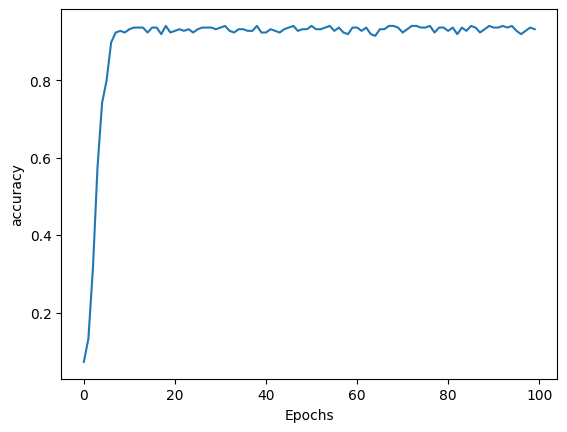

In [25]:
# Plotagem dos gráficos
plt.plot(history.history['accuracy'])
plt.xlabel("Epochs")
plt.ylabel('accuracy')
plt.show()
# A partir da epoca dez quase não houve variação, ele não aprendeu mais coisa, não aumentou a performace

In [26]:
# Ele vai tentar predizer as proximas 100 palavras
#Teste
seed_text = "vamos nessa fazer"
next_words = 100

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list],
                               maxlen=max_sequence_len - 1,
                               padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    # Procurando as palavras
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    # Concatenou as palavras
    seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 18ms/step
vamos nessa fazer nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa nessa
